In [ ]:
import h5py

with h5py.File('/Users/zhiyaoli/IQuS Dropbox/Zhiyao Li/String Breaking/Data/eigenstates20.h5', 'r') as f:
    data = f['Dataset1'][:]
    
    
real_part = data[-1]["Re"]
imag_part = data[-1]["Im"]
numerical_vacuum = real_part + 1j * imag_part

[0.06682322662754532,
 0.06719977057028925,
 0.09311235755584935,
 0.2507691504372701,
 0.6658823029060361,
 0.21756681687495882,
 0.6658823029060352,
 0.2507691504372703,
 0.0931123575558505,
 0.06719977057028935,
 0.06682322662754571,
 0.05859132277736817]

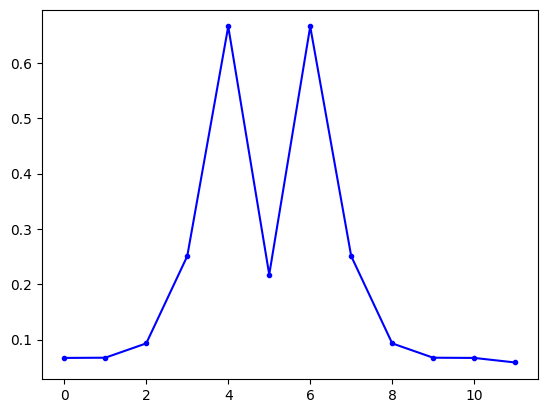

In [ ]:
# Time evolution. Evolve with e^(-iHt)

final_state_3 = sp.sparse.linalg.expm_multiply(-1j * Hf * 5,initial)

plot_E_per_site(final_state_3,nQQ)

# Classical Calculation 16 qubits

In [ ]:
nQ = 16

In [ ]:
# Initialize State
vacuum16 = true_vac(fake_vac(nQ),nQ)
initial16 = true_vac(activate(fake_vac,nQ),nQ)

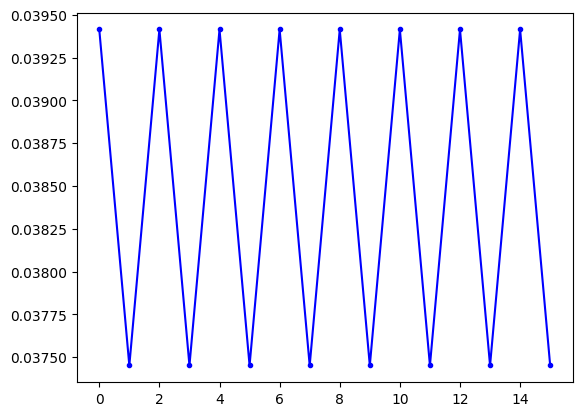

In [ ]:
plot_E_per_site(vacuum16,nQ)

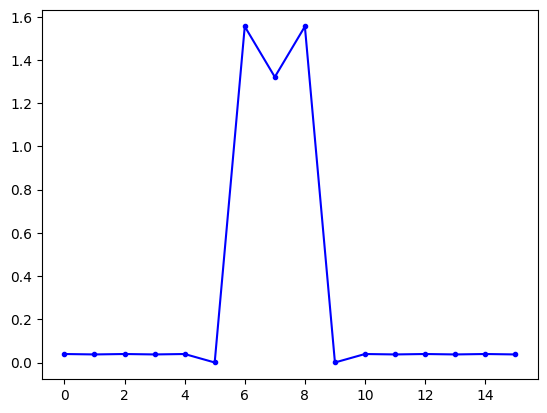

In [ ]:
plot_E_per_site(initial16,nQ)

In [ ]:
sp.sparse.linalg.norm(initial16)

0.9999999999999993

In [ ]:
Hf16 = Hfull(nQ,m,g).to_matrix(sparse = True)

In [ ]:
ts16 = np.arange(0, 20, 1) 
sites16 = np.arange(0, nQ, 1) 

Data16 = []
for i in ts16:
    final_state16 = sp.sparse.linalg.expm_multiply(-1j * Hf16 * i,initial16)
    E_exps16 = []
    for loc in sites16:
        E_exps16 += [(np.real(final_state16.conj().T @ He_persite_scipy(nQ,g,loc) @ final_state16)).toarray()[0][0]] 
    Data16.append(E_exps16)


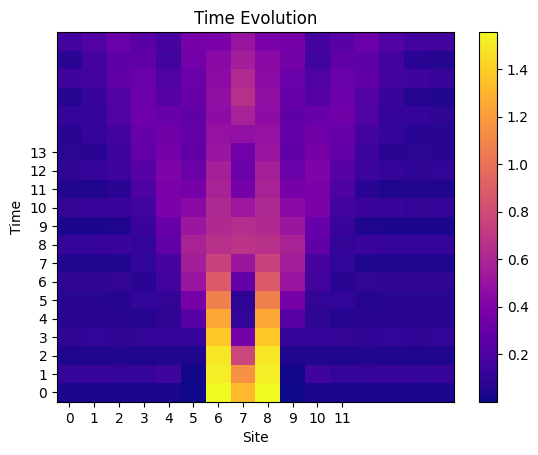

In [ ]:
plt.pcolormesh(sites16, ts16, Data16)
plt.colorbar()
plt.set_cmap('plasma')
# plt.clim(0.9729,0.99)
plt.xticks(sites)
plt.yticks(ts)
plt.xlabel("Site")
plt.ylabel("Time")
plt.title("Time Evolution")
plt.show()

(0.0, 1.2)

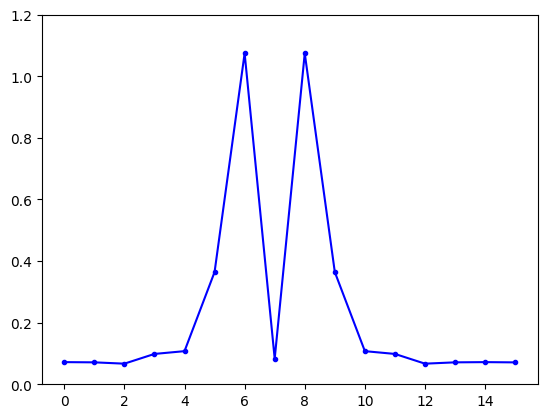

In [ ]:
# Spot where the string broke

final_state_3 = sp.sparse.linalg.expm_multiply(-1j * Hf16 * 5,initial16)

plot_E_per_site(final_state_3,nQ)
plt.ylim(0,1.2)

(0.0, 1.2)

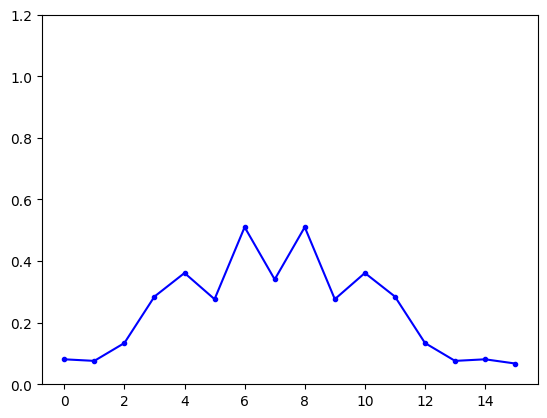

In [ ]:
# Find where it starts touching the boundary to use for VQE for the evolved state

# can just run this line to generate the state used to train VQE. No need to redo time scan
final_state_3 = sp.sparse.linalg.expm_multiply(-1j * Hf16 * 13,initial16) 

plot_E_per_site(final_state_3,nQ)
plt.ylim(0,1.2)

# Older version of Quantum Simulation Code

In [ ]:
# apply the VQE that initialize the circuit into true vacuum to circuit

def true_vac_old(angles = angles_from_vqe, nq = nQ, cir = None):
    if cir == None: cir = QuantumCircuit(nq)
    
    # even index operations
    for i in range(nq//2): # odd sites go to y basis
        cir.sdg(2*i+1)
        cir.h(2*i+1)    
    for i in range(nq//2):
        cir.rz((angles[0]+angles[1])/2, 2*i+1) # applying the single y gate
        cir.cx(2*i+1, (2*i+2)%nq)                      # applying IYZ
        cir.rz((angles[0]- angles[1])/2, (2*i+2)%nq)
        cir.cx(2*i+1, (2*i+2)%nq)
    for i in range(nq//2):   # applying ZYI, CNOT on the right cancelled with CNOT in ZYZ
        cir.cx(2*i, 2*i+1)                      
        cir.rz((angles[0] - angles[1])/2, 2*i+1)
    for i in range(nq//2):  # applying ZYZ, CNOT on the left cancelled
        cir.cx(2*i+1, (2*i+2)%nq)
        cir.rz((angles[0] + angles[1])/2, (2*i+2)%nq)
        cir.cx(2*i+1, (2*i+2)%nq)
        cir.cx(2*i, 2*i+1)  
    for i in range(nq//2): # odd sites go to y basis
        cir.h(2*i+1)   
        cir.s(2*i+1)
    
    #cir.barrier() # for visualization purposes
     
    # odd index operations
    for i in range(nq//2): # even sites go to y basis
        cir.sdg(2*i)
        cir.h(2*i)  
    for i in range(nq//2):
        cir.rz((angles[0]+angles[1])/2, 2*i) # applying the single y gate
        cir.cx(2*i, (2*i+1)%nq)                      # applying IYZ
        cir.rz((angles[0]- angles[1])/2, (2*i+1)%nq)
        cir.cx(2*i, (2*i+1)%nq)  
    for i in range(nq//2):   # applying ZYI, CNOT on the right cancelled with CNOT in ZYZ
        cir.cx(2*i+1, (2*i+2)%nq)                      
        cir.rz((angles[0] - angles[1])/2, (2*i+2)%nq)
    for i in range(nq//2):  # applying ZYZ, CNOT on the left cancelled
        cir.cx((2*i+2)%nq, (2*i+3)%nq)
        cir.rz((angles[0] + angles[1])/2, (2*i+3)%nq)
        cir.cx((2*i+2)%nq, (2*i+3)%nq)
        cir.cx(2*i+1, (2*i+2)%nq)
    for i in range(nq//2): # even sites go to y basis
        cir.h(2*i)
        cir.s(2*i)
        
    return cir

In [ ]:

def exp_hkin_even_old(t, nq = nQ, cir = None):
    if cir == None: cir = QuantumCircuit(nq)
    angles = (1/math.sqrt(2),1/(2* math.sqrt(2)))
    for i in range(nq//2): # odd sites go to x basis
        cir.h(2*i+1)    
    for i in range(nq//2):
        cir.rz((angles[0]+angles[1])*t/2, 2*i+1) # applying the single x gate
        cir.cx(2*i+1, (2*i+2)%nq)                      # applying IXZ
        cir.rz((angles[0]- angles[1])*t/2, (2*i+2)%nq)
        cir.cx(2*i+1, (2*i+2)%nq)
    for i in range(nq//2):   # applying ZXI, CNOT on the right cancelled with CNOT in ZXZ
        cir.cx(2*i, 2*i+1)                      
        cir.rz((angles[0] - angles[1])*t/2, 2*i+1)
    for i in range(nq//2):  # applying ZXZ, CNOT on the left cancelled
        cir.cx(2*i+1, (2*i+2)%nq)
        cir.rz((angles[0] + angles[1])*t/2, (2*i+2)%nq)
        cir.cx(2*i+1, (2*i+2)%nq)
        cir.cx(2*i, 2*i+1)  
    for i in range(nq//2): # odd sites go to x basis
        cir.h(2*i+1)   
    return cir

def exp_hkin_odd_old(t, nq = nQ, cir = None):
    if cir == None: cir = QuantumCircuit(nq)
    angles = (1/math.sqrt(2),1/(2* math.sqrt(2)))
    for i in range(nq//2): # even sites go to x basis
        cir.h(2*i)  
    for i in range(nq//2):
        cir.rz((angles[0]+angles[1])*t/2, 2*i) # applying the single x gate
        cir.cx(2*i, (2*i+1)%nq)                      # applying IXZ
        cir.rz((angles[0]- angles[1])*t/2, (2*i+1)%nq)
        cir.cx(2*i, (2*i+1)%nq)  
    for i in range(nq//2):   # applying ZXI, CNOT on the right cancelled with CNOT in ZXZ
        cir.cx(2*i+1, (2*i+2)%nq)                      
        cir.rz((angles[0] - angles[1])*t/2, (2*i+2)%nq)
    for i in range(nq//2):  # applying ZXZ, CNOT on the left cancelled
        cir.cx((2*i+2)%nq, (2*i+3)%nq)
        cir.rz((angles[0] + angles[1])*t/2, (2*i+3)%nq)
        cir.cx((2*i+2)%nq, (2*i+3)%nq)
        cir.cx(2*i+1, (2*i+2)%nq)
    for i in range(nq//2): # even sites go to x basis
        cir.h(2*i)
    return cir